In [172]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
%config inlineBackend.figure_format = 'retina'

In [173]:
data=pd.read_csv('Data.csv')
funding_data=pd.read_csv('NCAP_Funding.csv')
state_data=pd.read_csv('State_data.csv')

#Converting the "Timestamp" column to pandas timestamps
data["Timestamp"]=pd.to_datetime(data["Timestamp"])

#Making a list of months that will be used a few times later
months=["January","February","March","April","May","June","July","August","September","October","November","December"]

In [174]:
display(data.info())
display(data.describe())
display(data.isna().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1627461 entries, 0 to 1627460
Data columns (total 9 columns):
 #   Column     Non-Null Count    Dtype         
---  ------     --------------    -----         
 0   Timestamp  1627461 non-null  datetime64[ns]
 1   station    1627461 non-null  object        
 2   PM2.5      728348 non-null   float64       
 3   PM10       699014 non-null   float64       
 4   address    1387431 non-null  object        
 5   city       1563702 non-null  object        
 6   latitude   1563702 non-null  float64       
 7   longitude  1563702 non-null  float64       
 8   state      1563702 non-null  object        
dtypes: datetime64[ns](1), float64(4), object(4)
memory usage: 111.7+ MB


None

,Timestamp,PM2.5,PM10,latitude,longitude
count,1627461,728348.000000,699014.000000,1.563702e+06,1.563702e+06
mean,2020-12-20 23:59:59.999999232,58.883534,122.483993,2.244636e+01,7.853924e+01
min,2017-01-01 00:00:00,0.020000,0.020000,8.514909e+00,7.090917e+01
25%,2018-12-27 00:00:00,23.675381,55.156250,1.900008e+01,7.555592e+01
50%,2020-12-21 00:00:00,42.005990,95.396012,2.316317e+01,7.730991e+01
75%,2022-12-16 00:00:00,73.083333,159.661678,2.710336e+01,8.029090e+01
max,2024-12-10 00:00:00,1000.000000,1000.000000,3.406621e+01,9.463657e+01
std,NaN,56.979961,95.832195,5.600086e+00,4.838232e+00


,0
Timestamp,0
station,0
PM2.5,899113
PM10,928447
address,240030
city,63759
latitude,63759
longitude,63759
state,63759


# Spatial aggregation. [4 Marks]

Q1 Which state (consider all stations in that state) has the highest average PM2.5 concentration across all stations and across all years? \\

**Ans: Delhi**

In [175]:
state_mean=data.groupby('state')['PM2.5'].mean()
maxpm=state_mean.idxmax()

print(f"The state with the highest average PM2.5 concentration is {maxpm}")
display(state_mean.loc[[maxpm]])

The state with the highest average PM2.5 concentration is Delhi


,PM2.5
state,
Delhi,104.100918


Q2 Which state (consider all stations in that state) had the most days with hazardous PM2.5 levels (above 300 µg/m³) for the year 2023? \\
**Ans: Delhi**

In [176]:
#Obtaining 2023 data
data_2023=data.loc[data["Timestamp"].dt.year==2023]

#Hazardous Rows only
hazardous=data_2023.loc[data["PM2.5"]>300]
most_hazardous=hazardous.groupby("state")["PM2.5"].count().idxmax()

print(f"The state with the most days with hazardous PM2.5 levels is {most_hazardous}")
display(hazardous.groupby("state")["PM2.5"].count().loc[[most_hazardous]].rename("Number of days with hazardous PM levels"))

The state with the most days with hazardous PM2.5 levels is Delhi


,Number of days with hazardous PM levels
state,
Delhi,470


Q3 Which state has the highest variability in PM2.5 levels across its monitoring stations in 2023? (Think how would you measure variability) \\
**Ans: Delhi**

In [177]:
data_2023=data.loc[data["Timestamp"].dt.year==2023]

state_std=data_2023.groupby("state")["PM2.5"].std()

print(f"The state with the highest variability in PM2.5 levels is {state_std.idxmax()}")
display(state_std.iloc[[state_std.argmax()]].rename("Standard Deviation"))

The state with the highest variability in PM2.5 levels is Delhi


,Standard Deviation
state,
Delhi,82.797106


Q4 Which state has the lowest average PM2.5 levels during the Covid period (The year 2020-2021 both years inclusive)? \\
**Ans: Mizoram**

In [178]:
data_20_21=data.loc[data["Timestamp"].dt.year.isin([2020,2021])]

state_mean=data_20_21.groupby("state")["PM2.5"].mean()

print(f"The state with the lowest average PM2.5 levels during the Covid period is {state_mean.idxmin()}")
display(state_mean.iloc[[state_mean.argmin()]])

The state with the lowest average PM2.5 levels during the Covid period is Mizoram


,PM2.5
state,
Mizoram,14.32335


# Temporal Aggregation [3 Marks]

Q1 Report the station that recorded the highest value of PM 2.5 for the month Aug of 2020. \\
**Ans: Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB**

In [179]:
data_aug_20=data.loc[(data["Timestamp"].dt.month==8) & (data["Timestamp"].dt.year==2020)]

print("The station that recorded the highest value of PM2.5 for the month of August of 2020 is:")
print(data_aug_20["station"].loc[data_aug_20["PM2.5"].idxmax()])

display(data_aug_20.iloc[[data_aug_20["PM2.5"].argmax()]])

The station that recorded the highest value of PM2.5 for the month of August of 2020 is:
Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB


,Timestamp,station,PM2.5,PM10,address,city,latitude,longitude,state
737399,2020-08-07,"Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB",805.51,143.776667,"Inside Govt ITI College Compound, Jewargi Cros...",Kalaburagi,17.321993,76.822628,Karnataka


Q2 For the year 2018, calculate the average PM2.5 concentration for each season (Seasons being Winter: December-February, Summer: March-May, and Monsoon: June-September) for stations Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB. Identifying the season with the highest pollution.
[Thought Question] Can you suggest some potential factors on why certain seasons are generally more polluted than others? \
\
**Ans:Winter. Winter is generally more polluted because the energy demands rise in this season. Another reason could be because the cold air can trap pollutants causing highers pollution levels.**

In [180]:
req_data=data.loc[(data["station"]=="Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB") & (data["Timestamp"].dt.year==2018)]

req_data.insert(1, "Season", "")
req_data['Season'].loc[req_data["Timestamp"].dt.month.isin([12,1,2])]="Winter"
req_data['Season'].loc[req_data["Timestamp"].dt.month.isin([3,4,5])]="Summer"
req_data['Season'].loc[req_data["Timestamp"].dt.month.isin([6,7,8,9])]="Monsoon"


display(req_data.groupby('Season')['PM2.5'].mean())
highest_pm_season=req_data.groupby('Season')['PM2.5'].mean().idxmax()
print(f"{highest_pm_season} is the season with the most pollution")

,PM2.5
Season,
,56.825144
Monsoon,34.425196
Summer,NaN
Winter,67.492344


Winter is the season with the most pollution


Q3 Compare the average PM2.5 levels during weekends and weekdays for the station Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB over the year 2021. Create a plot to show these trends Steps:
* Calculate the monthly average PM2.5 for weekdays and weekends separately
* X-axis: Months (January to December).
* Y-axis: Average PM2.5 levels.
* Use two lines: one for the monthly average PM2.5 levels on weekdays and one for weekends.


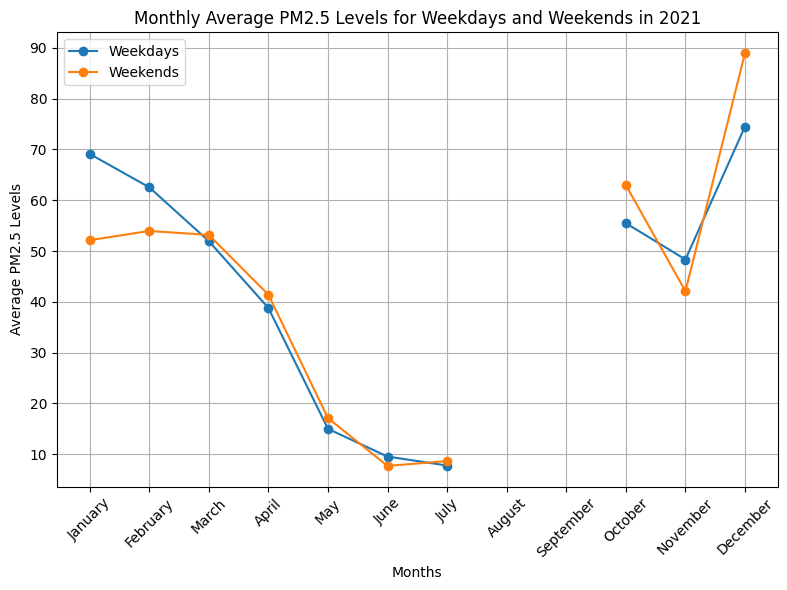

In [181]:
req_data=data.loc[(data["Timestamp"].dt.year==2021)&(data['station']=='Lal Bahadur Shastri Nagar, Kalaburagi - KSPCB'),["Timestamp","PM2.5"]]

req_data["Day"]=req_data["Timestamp"].dt.day_name()
req_data["Month"]=req_data["Timestamp"].dt.month_name()
req_data.loc[req_data["Day"].isin(["Saturday","Sunday"]),"Day"]="Weekend"
req_data.loc[req_data["Day"].isin(["Monday","Tuesday","Wednesday","Thursday","Friday"]),"Day"]="Weekday"

weekend_data=req_data.groupby('Day').get_group('Weekend')
weekday_data=req_data.groupby('Day').get_group('Weekday')

weekday_monthly=weekday_data.groupby("Month")["PM2.5"].mean()
weekend_monthly=weekend_data.groupby("Month")["PM2.5"].mean()

weekday_monthly=weekday_monthly[months]
weekend_monthly=weekend_monthly[months]

fig, ax=plt.subplots(figsize=(8,6))

ax.set_title("Monthly Average PM2.5 Levels for Weekdays and Weekends in 2021")
ax.plot(weekday_monthly,label="Weekdays",marker='o')
ax.plot(weekend_monthly,label="Weekends",marker='o')
ax.set_xticklabels(months,rotation=45)
ax.set_xlabel("Months")
ax.set_ylabel("Average PM2.5 Levels")
ax.legend()

plt.grid()
plt.tight_layout()
plt.show()

# Spatio-temporal aggregation [3 marks]


Q1 For each state, calculate the percentage increase or decrease in PM2.5 levels during monsoon months (June to September) compared to summer months (March to May). Which state has the most difference (increase or decrease) for the year 2022? \\
**Ans: Assam**

In [182]:
req_data=data.loc[data["Timestamp"].dt.year==2022]
req_data.insert(1,"Month",req_data["Timestamp"].dt.month_name())

summer_statewise=req_data.loc[req_data["Month"].isin(["March","April","May"])].groupby("state")["PM2.5"].mean().rename("Summer PM2.5 levels")
monsoon_statewise=req_data.loc[req_data["Month"].isin(["June","July","August","September"])].groupby("state")["PM2.5"].mean().rename("Monsoon PM2.5 levels")

states=pd.merge(summer_statewise,monsoon_statewise,left_index=True,right_index=True)
percentage_change=states.pct_change(axis=1).drop("Summer PM2.5 levels",axis=1).rename(columns={"Monsoon PM2.5 levels":"Percentage change"})
display(percentage_change)

print(f"The state with the most difference in year 2022 is {percentage_change.abs().idxmax().values[0]}")
display(percentage_change.abs().loc[[percentage_change.abs().idxmax().values[0]]])

,Percentage change
state,
Andhra Pradesh,-0.357569
Arunachal Pradesh,-0.530771
Assam,-0.611764
Bihar,-0.530000
Chandigarh,-0.451242
Chhattisgarh,-0.109753
Delhi,-0.552936
Gujarat,-0.449377
Haryana,-0.487047


The state with the most difference in year 2022 is Assam


,Percentage change
state,
Assam,0.611764


Q2 Plot the average PM2.5 levels for Delhi across each season (Winter: December-February, Summer: March-May, Monsoon: June-September) from 2017 to 2023. What seasonal variation, if any, can you observe in pollution levels? \\
**Ans: It is clear that winter has the highest pollution levels. These levels reduce in summer and further reduce in the monsoon season. The pollution levels again rise as winter approaches. This happens every year.**


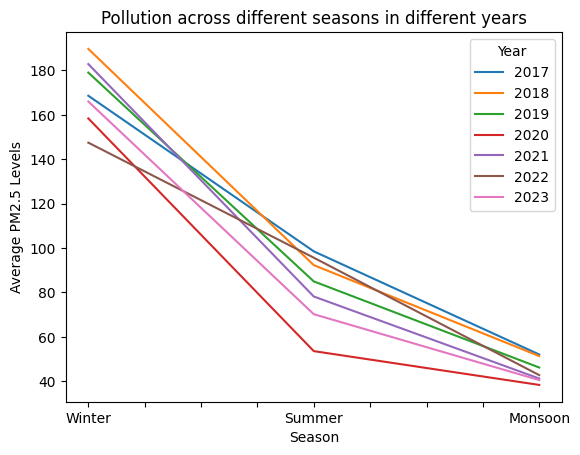

In [183]:
years=range(2017,2024)
delhi_stats=data.loc[data["state"]=="Delhi",["Timestamp","PM2.5"]]
delhi_stats=delhi_stats.loc[delhi_stats["Timestamp"].dt.year.isin(years)]


delhi_stats.insert(1, "Season", "")
delhi_stats['Season'].loc[delhi_stats["Timestamp"].dt.month.isin([12,1,2])]="Winter"
delhi_stats['Season'].loc[delhi_stats["Timestamp"].dt.month.isin([3,4,5])]="Summer"
delhi_stats['Season'].loc[delhi_stats["Timestamp"].dt.month.isin([6,7,8,9])]="Monsoon"

delhi_stats.insert(1,"Year",delhi_stats["Timestamp"].dt.year)
delhi_monthly=delhi_stats.groupby(["Season","Year"])["PM2.5"].mean()

delhi_monthly.unstack().loc[["Winter","Summer","Monsoon"]].plot(title="Pollution across different seasons in different years")
plt.xlabel("Season")
plt.ylabel("Average PM2.5 Levels")
plt.show()

Q3 Plot a time-series graph comparing Delhi’s PM2.5 levels with Mumbai’s from 2015 to 2023. Which city had more fluctuations? (Hint: Think what fluctuation means)\
**Ans: Delhi had more fluctuations which is seen in the graph.**

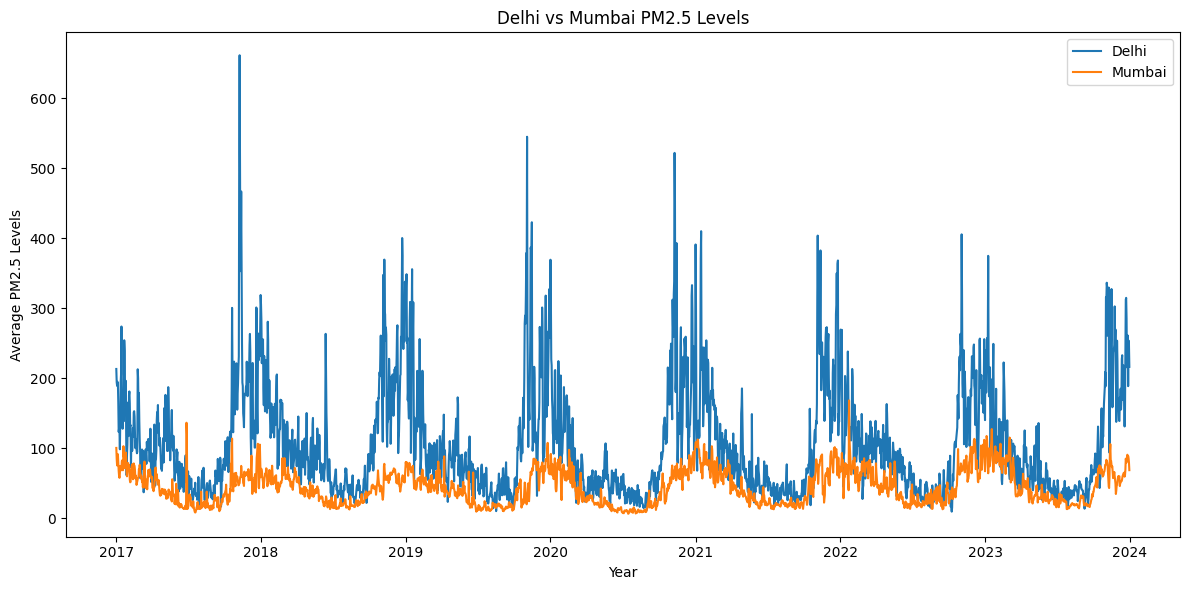

In [184]:
delhi_data=data.loc[(data["state"]=="Delhi")&(data["Timestamp"].dt.year>=2015)&(data["Timestamp"].dt.year<=2023),["Timestamp","PM2.5"]]
mumbai_data=data.loc[(data["state"]=="Maharashtra")&(data["Timestamp"].dt.year>=2015)&(data["Timestamp"].dt.year<=2023),["Timestamp","PM2.5"]]

fig,ax=plt.subplots(figsize=(12,6))
ax.plot(delhi_data.groupby("Timestamp")["PM2.5"].mean(),label="Delhi")
ax.plot(mumbai_data.groupby("Timestamp")["PM2.5"].mean(),label="Mumbai")
ax.set_title("Delhi vs Mumbai PM2.5 Levels")
ax.set_xlabel("Year")
ax.set_ylabel("Average PM2.5 Levels")
ax.legend()
plt.tight_layout()
plt.show()

# Population-Based [3 Marks]

Q1 Which state in India has the highest number of monitoring stations relative to its population?\
**Ans: Chandigarh**

In [185]:
states=pd.DataFrame(data.drop_duplicates("station").groupby("state")["station"].count())
states.columns=["No_of_Stations"]

states=pd.merge(states,state_data[["State","Population"]],left_index=True,right_on="State").set_index("State")

print(f"The state in India which has the highest number of monitoring stations relative to its population is {states.eval('Relative=No_of_Stations/Population')['Relative'].idxmax()}")
states.iloc[[states.eval("Relative=No_of_Stations/Population")["Relative"].argmax()]]

The state in India which has the highest number of monitoring stations relative to its population is Chandigarh


,No_of_Stations,Population
State,,
Chandigarh,3,1055450


Q2 Plot a bar chart showing the top 5 most polluted states in terms of per capita PM2.5 exposure in 2023.


,PM2.5,Population,Polluion_Per_Capita
State,,,
Chandigarh,59.414055,1055450,0.000056
Sikkim,14.927530,610577,0.000024
Tripura,80.469872,3673917,0.000022
Puducherry,24.286078,1247953,0.000019
Nagaland,32.721157,1978502,0.000017


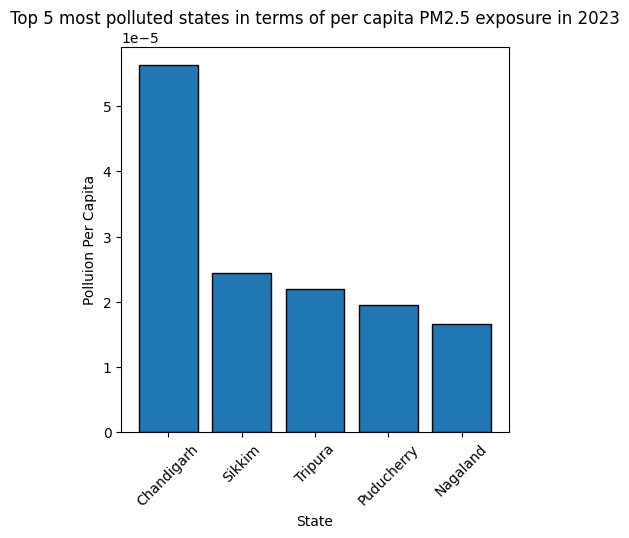

In [186]:
req_data=data.loc[data["Timestamp"].dt.year==2023]
states=pd.DataFrame(req_data.groupby("state")["PM2.5"].mean())
states=states.merge(state_data[["State","Population"]],left_index=True,right_on="State").set_index("State")
top5=states.eval("Polluion_Per_Capita=`PM2.5`/Population").sort_values("Polluion_Per_Capita",ascending=False).head(5)
display(top5)

plt.figure(figsize=(5,5))
plt.bar(top5.index,top5["Polluion_Per_Capita"],edgecolor="k")
plt.xticks(rotation=45)
plt.title("Top 5 most polluted states in terms of per capita PM2.5 exposure in 2023")
plt.xlabel("State")
plt.ylabel("Polluion Per Capita")
plt.show()

Q3 Plot the relationship between population density and average PM2.5 concentration for each state. What conclusion can you draw about the correlation between population density and pollution?
* X-axis: Population density (people per square kilometer).
* Y-axis: Average PM2.5 concentration.
* Use a scatter plot to show the relationship, where each point represents a state.

**Ans:It can be observed that the average PM2.5 levels increase as the population density increases(positive corelation).**

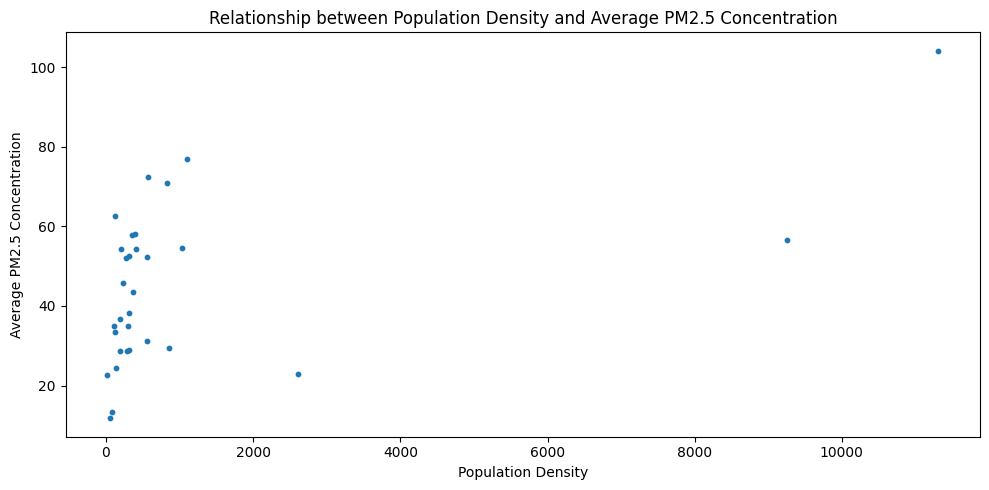

In [187]:
req_data=data.groupby('state')['PM2.5'].mean()
req_data=pd.merge(req_data,state_data[["State","Population","Area (km2)"]],left_index=True,right_on="State")
req_data["Population Density"]=req_data["Population"]/req_data["Area (km2)"]
req_data.set_index("State",inplace=True)

fig,ax=plt.subplots(figsize=(10,5))

ax.scatter(req_data["Population Density"],req_data["PM2.5"],s=10)
ax.set_xlabel("Population Density")
ax.set_ylabel("Average PM2.5 Concentration")
ax.set_title("Relationship between Population Density and Average PM2.5 Concentration")

plt.tight_layout()
plt.show()

# Area Based [3 Marks]



Q1 Which state has the highest PM2.5 concentration per square kilometer? Plot the pollution levels for all states relative to their area.
* X-axis: States.
* Y-axis: PM2.5 concentration per square kilometer.
* Use a bar plot where each bar represents a state, and the height shows PM2.5 per sq km.


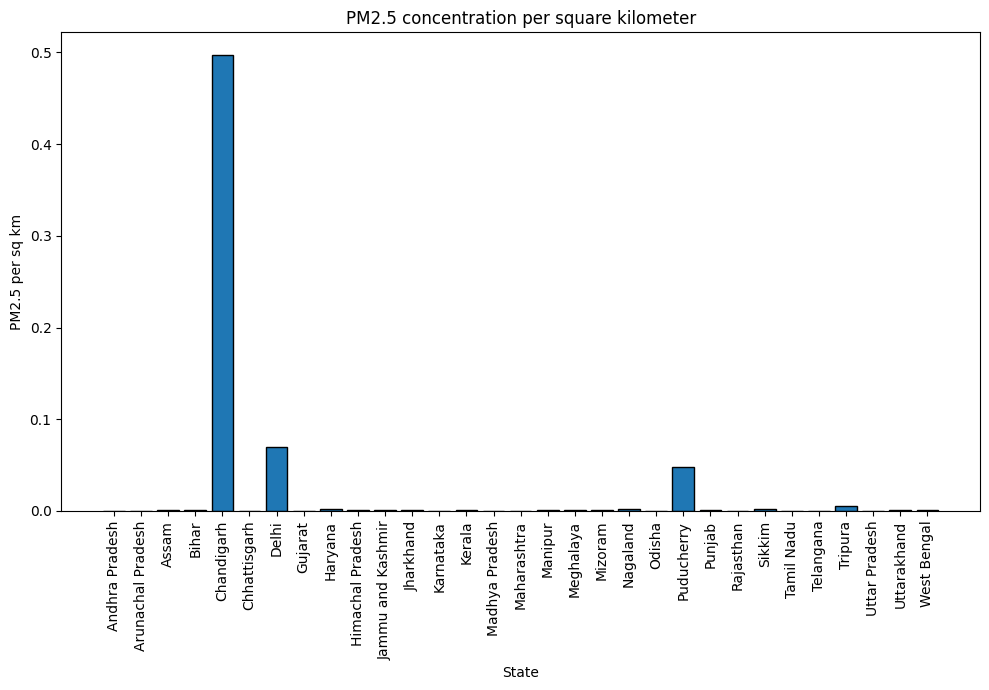

In [188]:
states=data.groupby('state')["PM2.5"].mean()
states=pd.merge(states,state_data[["State","Area (km2)"]],left_index=True,right_on="State")
states["PM2.5 per sq km"]=states["PM2.5"]/states["Area (km2)"]
states.set_index("State",inplace=True)

fig,ax=plt.subplots(figsize=(10,7))
ax.bar(states.index,states["PM2.5 per sq km"],edgecolor='k')
ax.set_xlabel("State")
ax.set_ylabel("PM2.5 per sq km")
ax.set_title("PM2.5 concentration per square kilometer")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Q2 Compare the total number of monitoring stations per square kilometer in each state. Identify the state with the highest density of monitoring stations relative to its area. Show a bar plot where each bar represents a state, and the height shows the number of monitoring stations per square kilometer.

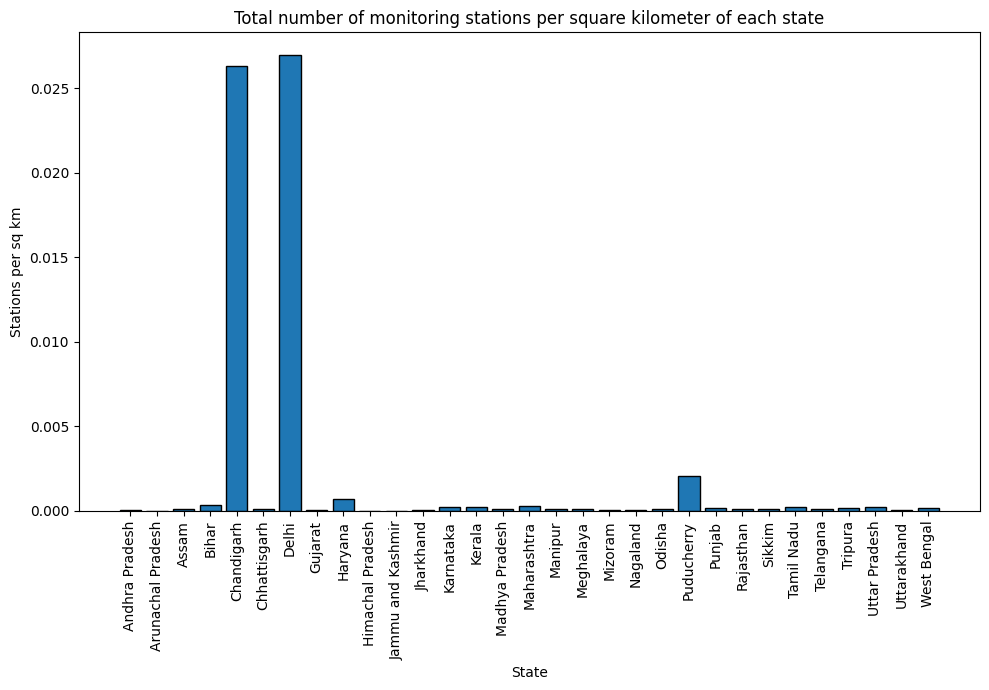

In [189]:
states=pd.DataFrame(data.drop_duplicates("station").groupby("state")["station"].count())
states.columns=["No_of_Stations"]
states=pd.merge(states,state_data[["State","Area (km2)"]],left_index=True,right_on="State")
states["Stations per sq km"]=states["No_of_Stations"]/states["Area (km2)"]
states.set_index("State",inplace=True)

fig,ax=plt.subplots(figsize=(10,7))
ax.bar(states.index,states["Stations per sq km"],edgecolor='k')
ax.set_xlabel("State")
ax.set_ylabel("Stations per sq km")
ax.set_title("Total number of monitoring stations per square kilometer of each state")
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Q3 Compare the average PM2.5 levels between Maharashtra and Madhya Pradesh over the year 2021. Given that both states have similar area sizes but different population densities, analyze how population density impacts pollution levels in these two states.\
**Ans:Both the states have almost the same area but Maharahtra has much higher Population density. It can be observed that Maharashtra has slightly lower average PM2.5 levels. In these two states, there is a slight decrease in average PM2.5 levels with an increase in population density.**

In [190]:
req_data=data.loc[(data["Timestamp"].dt.year==2021)&(data["state"].isin(["Maharashtra","Madhya Pradesh"]))]
req_data=req_data.groupby("state")["PM2.5"].mean()
req_data=pd.merge(req_data,state_data[["State","Population","Area (km2)"]],left_index=True,right_on="State")
req_data["Population Density"]=req_data["Population"]/req_data["Area (km2)"]
req_data.set_index("State",inplace=True)

display(req_data)

,PM2.5,Population,Area (km2),Population Density
State,,,,
Madhya Pradesh,47.095952,72626809,308252,235.608557
Maharashtra,46.440044,112374333,307713,365.192023


# Funding Based [3 Marks]


Q1 Compare the average PM2.5 levels between states that received NCAP funding and those that did not in 2021.


Funded states:


,PM2.5
state,
Andhra Pradesh,33.316491
Bihar,81.967836
Chandigarh,44.360885
Delhi,105.401629
Himachal Pradesh,NaN
Jammu and Kashmir,31.909474
Karnataka,26.745015
Madhya Pradesh,47.095952
Maharashtra,46.440044


Average PM2.5 level of all the funded states:50.89422484489779


Non-funded states:


,PM2.5
state,
Assam,61.017780
Chhattisgarh,24.863968
Gujarat,50.780194
Jharkhand,NaN
Meghalaya,12.197489
Punjab,51.940080
Rajasthan,61.923695
Tamil Nadu,28.896307
West Bengal,59.391918


Average PM2.5 level of all the non-funded states:43.87642878615332


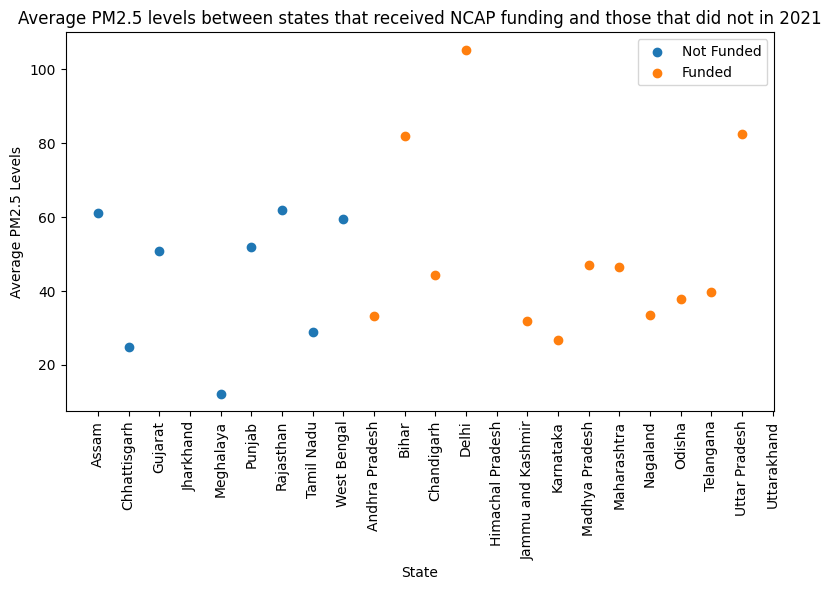

In [191]:
stats_2021=funding_data[["State","Amount released during FY 2021-22"]]
stats_2021['Amount released during FY 2021-22']=pd.to_numeric(stats_2021['Amount released during FY 2021-22'],errors='coerce')
states=stats_2021.groupby('State')["Amount released during FY 2021-22"].sum()
states.rename(index={"Jammu & Kashmir":"Jammu and Kashmir"},inplace=True)

funded=np.array(states[states>0].index,dtype='str')
not_funded=np.array(states[states==0].index,dtype='str')

req_data=data.loc[data["Timestamp"].dt.year==2021]
req_data=req_data.groupby("state")["PM2.5"].mean()

print("Funded states:")
display(req_data[funded])
print(f"Average PM2.5 level of all the funded states:{req_data[funded].mean()}")

print("\n\nNon-funded states:")
display(req_data[not_funded])
print(f"Average PM2.5 level of all the non-funded states:{req_data[not_funded].mean()}")

fig,ax=plt.subplots(figsize=(8,6))
ax.scatter(not_funded,req_data[not_funded],label="Not Funded")
ax.scatter(funded,req_data[funded],label="Funded")
ax.set_title("Average PM2.5 levels between states that received NCAP funding and those that did not in 2021")
ax.set_xlabel("State")
ax.set_ylabel("Average PM2.5 Levels")
ax.legend()
plt.xticks(rotation=90)
plt.tight_layout()
plt.show()

Q2 Create a time series plot showing PM2.5 levels with an increment in NCAP funding for Assam. Has an increment of the financing led to noticeable improvements in air quality?\
**Ans:There is no noticeable improvement in the air quality despite an increment in funding.**

,State,Amount released during FY 2019-20,Amount released during FY 2020-21,Amount released during FY 2021-22
13,Assam,0.12,5,NaN
14,Assam,0.06,2,NaN
15,Assam,0.06,1,NaN
16,Assam,0.06,2,NaN
17,Assam,0.06,2,NaN


,0
Amount released during FY 2019-20,0.36
Amount released during FY 2020-21,12


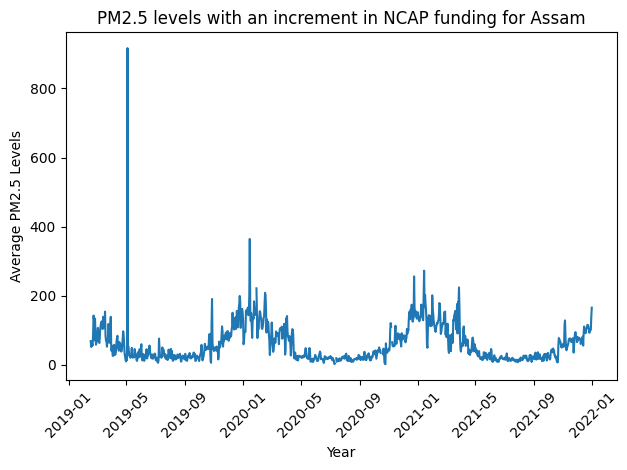

In [192]:
funds=funding_data.iloc[:,[1,3,4,5]]
assamfunds=funds.loc[funds["State"]=="Assam"]
for i in range(1,4):
  assamfunds.iloc[:,i]=pd.to_numeric(assamfunds.iloc[:,i],errors='coerce')
display(assamfunds)

display(assamfunds.iloc[:,1:3].sum(axis=0))

assamstats=data.loc[(data["state"]=="Assam")&(data["Timestamp"].dt.year.isin([2019,2020,2021]))].groupby("Timestamp")["PM2.5"].mean()
plt.plot(assamstats)
plt.xticks(rotation=45)
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title("PM2.5 levels with an increment in NCAP funding for Assam")
plt.tight_layout()
plt.show()

Q3 Create a scatter plot to showcase the area versus funding received by a state. Mark every state with a different color and show the legend outside the plot.


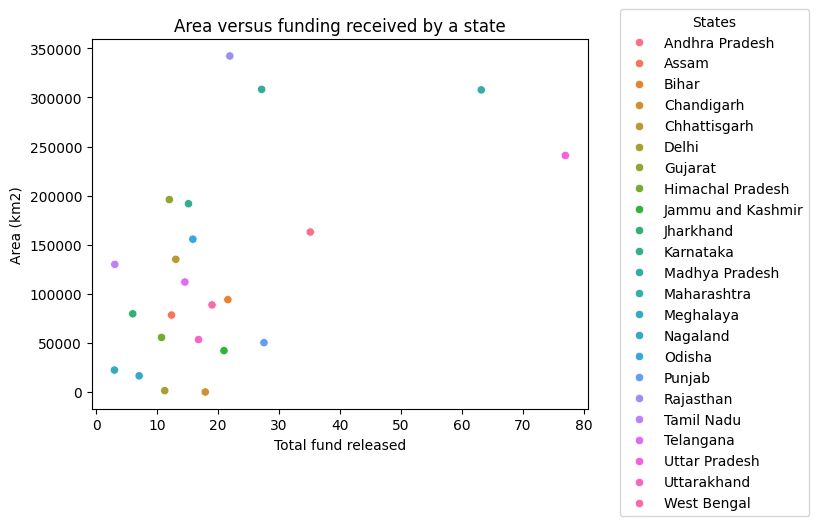

In [193]:
funds=funding_data.groupby("State")["Total fund released"].sum()
funds.rename(index={"Jammu & Kashmir":"Jammu and Kashmir"},inplace=True)
funds=pd.merge(funds,state_data[["State","Area (km2)"]],left_index=True,right_on="State")
funds.set_index("State",inplace=True)

ax=sns.scatterplot(data=funds,y="Area (km2)",x="Total fund released",hue=funds.index)
ax.legend(title="States",bbox_to_anchor=(1.05, 1.1))
plt.title("Area versus funding received by a state")
plt.show()

#Miscellaneous Questions [5 Marks]


Q1 For the most polluted city in 2023 (highest average pollution in 2023), calculate the percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³)[1 Mark]\
**Ans: The most polluted city in 2023 is Darbhanga with 23.07% of the days being above the hazardous threshold**

In [194]:
stats2023=data.loc[data["Timestamp"].dt.year==2023]
print("Most polluted city in 2023:")
display(stats2023.groupby('city')["PM2.5"].mean().sort_values(ascending=False).head(1))

req_data=stats2023.loc[(stats2023["city"]=="Darbhanga")]

print("Percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³): ",end='')
print((req_data.query("`PM2.5`>300")["PM2.5"].count()/req_data["PM2.5"].count())*100,"%")

Most polluted city in 2023:


,PM2.5
city,
Darbhanga,242.917032


Percentage of days with PM2.5 levels above the hazardous threshold (300 µg/m³): 23.076923076923077 %


Q2 Analyze the PM2.5 levels in Delhi during Diwali (October-November) and New Year compared to regular months over the 3 years (2018-2020). Do you observe any significant pollution spikes during these festivals? If spikes are observed, Can you mark these spikes using arrows?[1.5 Mark]\
**Ans: Yes, there are spikes during the festive seasons which are marked by arrows in the graph**


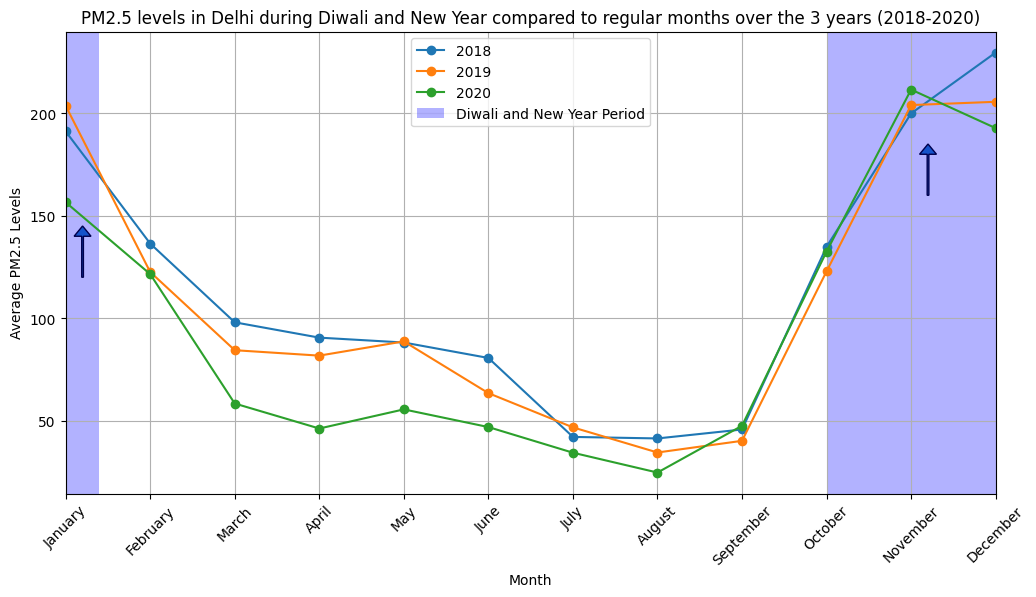

In [195]:
delhi_stats=data.query("city=='Delhi'").loc[data["Timestamp"].dt.year.isin([2018,2019,2020]),["Timestamp","PM2.5"]]
delhi_stats["Month"]=delhi_stats["Timestamp"].dt.month_name()
delhi_stats["Year"]=delhi_stats["Timestamp"].dt.year

grouped=delhi_stats.groupby(["Year","Month"])["PM2.5"].mean()
grouped=grouped.loc[[2018,2019,2020],months]

fig,ax=plt.subplots(figsize=(12,6))
ax.plot(grouped[2018].values,marker='o',label=2018)
ax.plot(grouped[2019].values,marker='o',label=2019)
ax.plot(grouped[2020].values,marker='o',label=2020)

plt.arrow(10.2,160,0,20,width=0.02,head_length=5,head_width=0.2)
plt.arrow(0.2,120,0,20,width=0.02,head_length=5,head_width=0.2)

ax.set_xticks(range(12))
ax.set_xlim(0,11)
ax.set_xticklabels(months,rotation=45)
ax.set_xlabel("Month")
ax.set_ylabel("Average PM2.5 Levels")
ax.set_title("PM2.5 levels in Delhi during Diwali and New Year compared to regular months over the 3 years (2018-2020)")
plt.axvspan(9,11,facecolor='b',alpha=0.3,label="Diwali and New Year Period")
plt.axvspan(0,0.4,facecolor='b',alpha=0.3)
plt.legend()
plt.grid()
plt.show()

Q3 Identify the state that received the highest NCAP funding in 2020 and determine if its air pollution levels improved significantly by 2023. Use a line graph to compare yearly average PM2.5 trends.[1 Mark]\
**Ans:Andhra Pradesh received the highest NCAP funding, yet pollution levels showed no significant improvement until 2023. In fact, there was a slight increase in the pollution levels despite the substantial funding.**


The state the highest NCAP funding in 2020:


,Amount released during FY 2020-21
State,
Andhra Pradesh,17.28


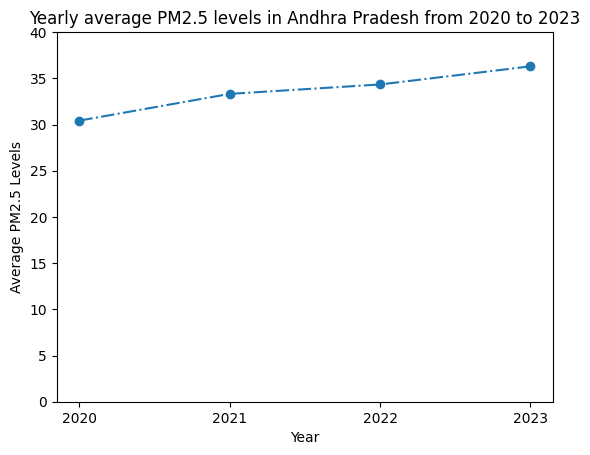

In [196]:
funds2020=funding_data[['State','Amount released during FY 2020-21']]
funds2020['Amount released during FY 2020-21']=pd.to_numeric(funds2020['Amount released during FY 2020-21'],errors='coerce')
print("The state the highest NCAP funding in 2020:")
display(funds2020.groupby('State')['Amount released during FY 2020-21'].sum().sort_values(ascending=False).head(1))

req_data=data.loc[(data["state"]=="Andhra Pradesh")&(data["Timestamp"].dt.year.isin(range(2020,2024)))]
req_data["Year"]=req_data["Timestamp"].dt.year
req_data=req_data.groupby("Year")["PM2.5"].mean()

plt.plot(req_data,marker='o',ls="-.")
plt.xticks(range(2020,2024))
plt.ylim(0,40)
plt.xlabel("Year")
plt.ylabel("Average PM2.5 Levels")
plt.title("Yearly average PM2.5 levels in Andhra Pradesh from 2020 to 2023")
plt.show()

Q4 Draw the map of India and plot the sensor locations on the map.[1.5 Mark]


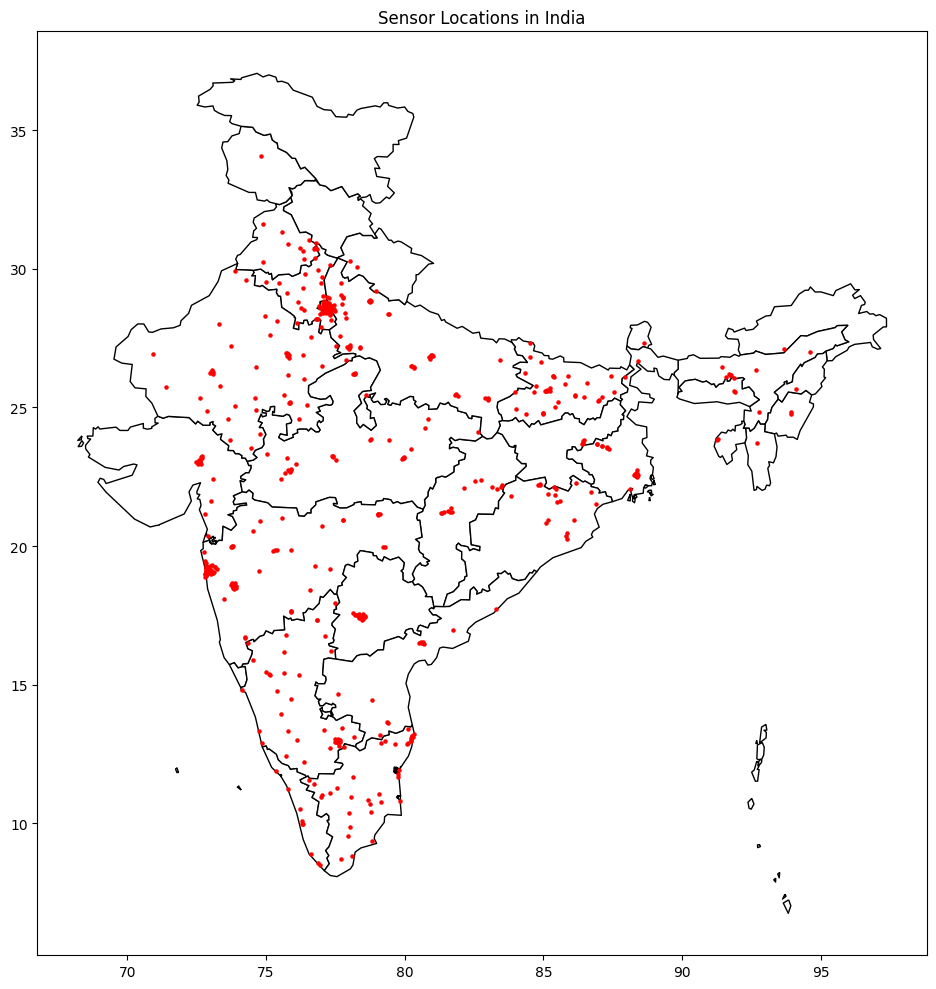

In [197]:
import geopandas as gpd
import shapefile as shp
from shapely.geometry import Point

coords=data[["station","latitude","longitude"]]
coords=coords.dropna(axis=0).drop_duplicates("station").set_index("station")

coord_points=gpd.GeoDataFrame(coords,geometry=gpd.points_from_xy(coords.longitude,coords.latitude))

map=gpd.read_file("india-polygon.shp")
fig,axis = plt.subplots(figsize = (10,10))

map.plot(ax=axis,color='w',edgecolor="k")
coord_points.plot(ax=axis,markersize=5,color='r')
plt.title("Sensor Locations in India")
plt.tight_layout()
plt.show()

# Tell us something new [1 Mark]
Q1 Tell us something interesting from the dataset that we have not asked. Anything that intrigues you, anything that might be useful to the policymakers. \
**Ans: The distribution of the monitoring stations is uneven. Few states have a very low number of stations which might skew the pollution levels of those states. This hinders the development of optimal solutions by the policy makers.**
